In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import random
InteractiveShell.ast_node_interactivity = "all"
import os
from datetime import datetime
import plotly.express as px
import glob
from tqdm import tqdm

In [3]:
print("Hello World")

Hello World


In [5]:
df = pd.read_csv("data/fire_nrt_M-C61_358737.csv")

In [6]:
df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,31.65228,-97.08868,300.75,1.00,1.00,2023-01-01,1702,Terra,MODIS,41,6.1NRT,289.00,3.03,D
1,32.40350,-99.22527,303.55,1.07,1.03,2023-01-01,1702,Terra,MODIS,40,6.1NRT,288.79,5.30,D
2,32.40496,-99.23645,313.35,1.07,1.03,2023-01-01,1702,Terra,MODIS,74,6.1NRT,289.93,12.59,D
3,33.79848,-94.81848,306.13,1.09,1.04,2023-01-01,1702,Terra,MODIS,44,6.1NRT,284.97,8.08,D
4,29.57430,-98.02966,305.79,1.00,1.00,2023-01-01,1702,Terra,MODIS,58,6.1NRT,293.75,3.86,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39956,19.41791,-155.28799,300.65,1.22,1.10,2023-06-18,826,Terra,MODIS,13,6.1NRT,288.16,6.04,N
39957,19.39738,-155.27895,349.05,1.95,1.36,2023-06-18,1246,Aqua,MODIS,100,6.1NRT,286.47,164.84,N
39958,19.41270,-155.29488,375.04,1.94,1.36,2023-06-18,1246,Aqua,MODIS,100,6.1NRT,292.28,358.01,N
39959,19.40931,-155.27634,394.27,1.95,1.36,2023-06-18,1246,Aqua,MODIS,100,6.1NRT,298.17,589.75,N


In [8]:
df2 = pd.read_csv("data/fire_archive_M-C61_358737.csv")
df2

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,40.3912,-79.8591,301.6,1.6,1.2,2018-06-01,257,Terra,MODIS,42,6.03,289.7,7.0,N,2
1,41.4612,-81.6754,305.3,1.9,1.3,2018-06-01,258,Terra,MODIS,64,6.03,291.1,12.8,N,2
2,30.3241,-91.2348,309.1,1.4,1.2,2018-06-01,433,Terra,MODIS,74,6.03,296.7,11.4,N,2
3,33.7179,-95.9885,307.3,1.0,1.0,2018-06-01,434,Terra,MODIS,69,6.03,297.1,4.8,N,0
4,31.6460,-101.7709,309.0,1.7,1.3,2018-06-01,434,Terra,MODIS,70,6.03,297.7,14.9,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638177,37.3712,-94.0926,308.8,1.3,1.1,2022-12-31,1918,Aqua,MODIS,68,6.03,286.9,12.9,D,0
638178,35.1068,-94.8170,321.1,1.5,1.2,2022-12-31,1918,Aqua,MODIS,81,6.03,287.0,35.7,D,0
638179,35.0974,-94.8194,314.0,1.5,1.2,2022-12-31,1918,Aqua,MODIS,74,6.03,287.4,23.7,D,0
638180,39.1740,-94.3173,306.0,1.2,1.1,2022-12-31,1919,Aqua,MODIS,54,6.03,276.2,13.7,D,0


In [9]:
t0 = datetime.now()
filenames = glob.glob('data/*.csv')
filenames
len(filenames)

['data/fire_nrt_M-C61_358737.csv',
 'data/fire_nrt_J1V-C2_358738.csv',
 'data/fire_nrt_SV-C2_358739.csv',
 'data/fire_archive_M-C61_358737.csv',
 'data/fire_archive_SV-C2_358739.csv']

5

In [11]:
rows = []
for f in tqdm(filenames):
    df = pd.read_csv(f, parse_dates=['acq_time'], low_memory=False #, nrows=1000
                    )
    csv_name = f.split('/')[-1]
    row = [
        f, csv_name, df.shape[0], df.shape[1], df.acq_date.min(), df.acq_date.max(),
        df.satellite.max(), df.instrument.max(), df.version.max(),
        df.latitude.nunique(), df.longitude.nunique(),
        df.confidence.nunique(), df.satellite.nunique(), df.acq_date.nunique()
    ]
    rows.append(row)

cols = [
    'path', 'csv', 'rows', 'cols', 'start', 'end',
    'satellite', 'instrument', 'version',
    'lats', 'lons', 'confs', 'sats', 'days'
]
filestats = pd.DataFrame(rows, columns=cols)
filestats.sort_values(by=['start', 'instrument'])

  0%|                                                                                                                                                                     | 0/5 [00:00<?, ?it/s]/var/folders/ch/dfwbr0753ygb4c4qp28pw4qh0000gn/T/ipykernel_38101/1298760360.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f, parse_dates=['acq_time'], low_memory=False #, nrows=1000
 40%|██████████████████████████████████████████████████████████████▊                                                                                              | 2/5 [00:02<00:03,  1.09s/it]/var/folders/ch/dfwbr0753ygb4c4qp28pw4qh0000gn/T/ipykernel_38101/1298760360.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df 

,path,csv,rows,cols,start,end,satellite,instrument,version,lats,lons,confs,sats,days
3,data/fire_archive_M-C61_358737.csv,fire_archive_M-C61_358737.csv,638182,15,2018-06-01,2022-12-31,Terra,MODIS,6.03,228057,330093,101,2,1675
4,data/fire_archive_SV-C2_358739.csv,fire_archive_SV-C2_358739.csv,2547910,15,2018-06-01,2022-08-31,N,VIIRS,1,1910814,1663564,3,1,1552
1,data/fire_nrt_J1V-C2_358738.csv,fire_nrt_J1V-C2_358738.csv,2056103,14,2019-12-04,2023-06-18,1,VIIRS,2.0NRT,1199175,1324964,3,1,1291
2,data/fire_nrt_SV-C2_358739.csv,fire_nrt_SV-C2_358739.csv,325965,14,2022-09-01,2023-06-18,N,VIIRS,2.0NRT,280451,286882,3,1,291
0,data/fire_nrt_M-C61_358737.csv,fire_nrt_M-C61_358737.csv,39961,14,2023-01-01,2023-06-18,Terra,MODIS,6.1NRT,39285,39487,99,2,169


In [42]:
data = pd.read_csv("data/fire_archive_M-C61_358737.csv")
data

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,40.3912,-79.8591,301.6,1.6,1.2,2018-06-01,257,Terra,MODIS,42,6.03,289.7,7.0,N,2
1,41.4612,-81.6754,305.3,1.9,1.3,2018-06-01,258,Terra,MODIS,64,6.03,291.1,12.8,N,2
2,30.3241,-91.2348,309.1,1.4,1.2,2018-06-01,433,Terra,MODIS,74,6.03,296.7,11.4,N,2
3,33.7179,-95.9885,307.3,1.0,1.0,2018-06-01,434,Terra,MODIS,69,6.03,297.1,4.8,N,0
4,31.6460,-101.7709,309.0,1.7,1.3,2018-06-01,434,Terra,MODIS,70,6.03,297.7,14.9,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638177,37.3712,-94.0926,308.8,1.3,1.1,2022-12-31,1918,Aqua,MODIS,68,6.03,286.9,12.9,D,0
638178,35.1068,-94.8170,321.1,1.5,1.2,2022-12-31,1918,Aqua,MODIS,81,6.03,287.0,35.7,D,0
638179,35.0974,-94.8194,314.0,1.5,1.2,2022-12-31,1918,Aqua,MODIS,74,6.03,287.4,23.7,D,0
638180,39.1740,-94.3173,306.0,1.2,1.1,2022-12-31,1919,Aqua,MODIS,54,6.03,276.2,13.7,D,0


In [17]:
data.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [18]:
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,40.3912,-79.8591,301.6,1.6,1.2,2018-06-01,257,Terra,MODIS,42,6.03,289.7,7.0,N,2
1,41.4612,-81.6754,305.3,1.9,1.3,2018-06-01,258,Terra,MODIS,64,6.03,291.1,12.8,N,2
2,30.3241,-91.2348,309.1,1.4,1.2,2018-06-01,433,Terra,MODIS,74,6.03,296.7,11.4,N,2
3,33.7179,-95.9885,307.3,1.0,1.0,2018-06-01,434,Terra,MODIS,69,6.03,297.1,4.8,N,0
4,31.6460,-101.7709,309.0,1.7,1.3,2018-06-01,434,Terra,MODIS,70,6.03,297.7,14.9,N,0


# Data Visualizations

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='brightness', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Brightness')

Text(0.5, 0, 'Brightness')

Text(0, 0.5, 'Frequency')

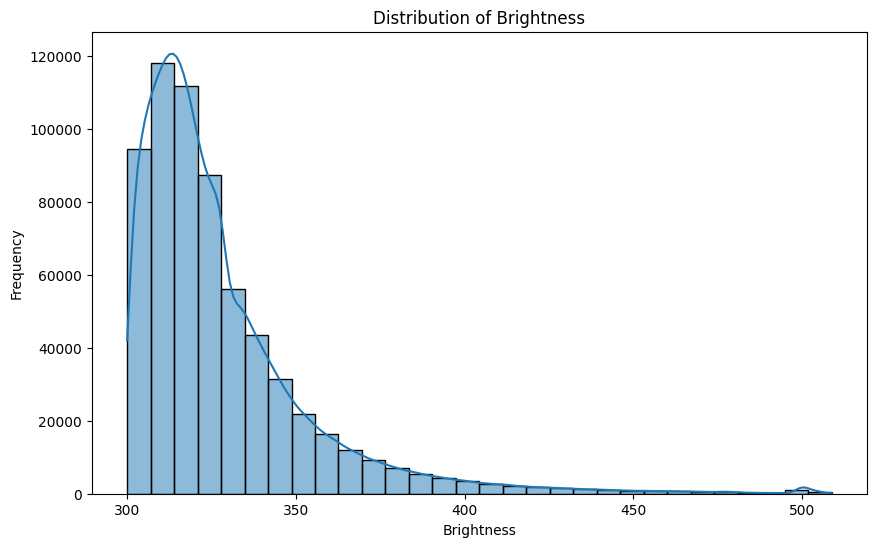

In [23]:
# Create a histogram of brightness
plt.figure(figsize=(10, 6))
sns.histplot(data['brightness'], bins=30, kde=True)
plt.title('Distribution of Brightness')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='confidence', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Confidence')

Text(0.5, 0, 'Confidence')

Text(0, 0.5, 'Frequency')

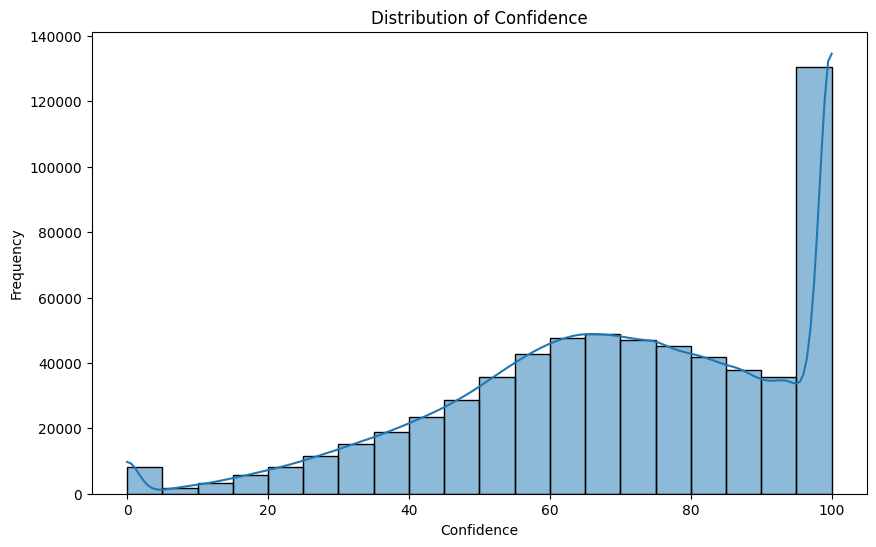

In [24]:
# Create a histogram of confidence
plt.figure(figsize=(10, 6))
sns.histplot(data['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='longitude', ylabel='latitude'>

<Axes: xlabel='longitude', ylabel='latitude'>

Text(0.5, 1.0, 'Geographic Distribution of Wildfires (Heatmap)')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

(-176.6098, -67.2162)

(18.9686, 70.3211)

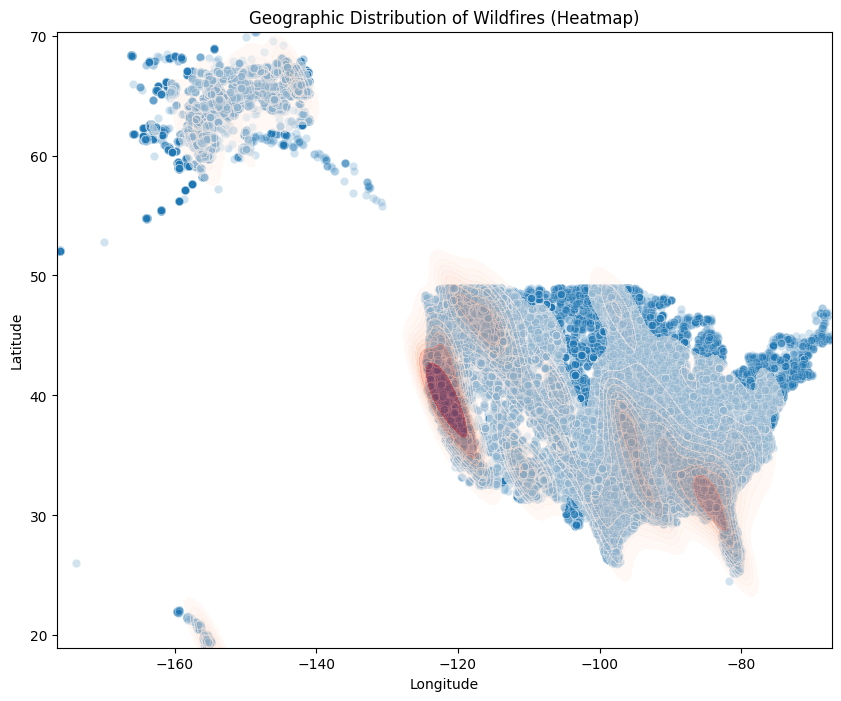

In [33]:
latitude = data['latitude']
longitude = data['longitude']

# Create a scatter plot of latitude and longitude
plt.figure(figsize=(10, 8))

# Scatter plot with low alpha for data points
sns.scatterplot(x=longitude, y=latitude, alpha=0.2)

# Overlay a kernel density estimate (KDE) plot for heatmap effect
sns.kdeplot(x=longitude, y=latitude, cmap="Reds", fill=True, alpha=0.5)

plt.title('Geographic Distribution of Wildfires (Heatmap)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(data['longitude'].min(), data['longitude'].max())
plt.ylim(data['latitude'].min(), data['latitude'].max())
plt.show()




Text(0.5, 1.02, 'Pairwise Relationships of Numerical Columns')

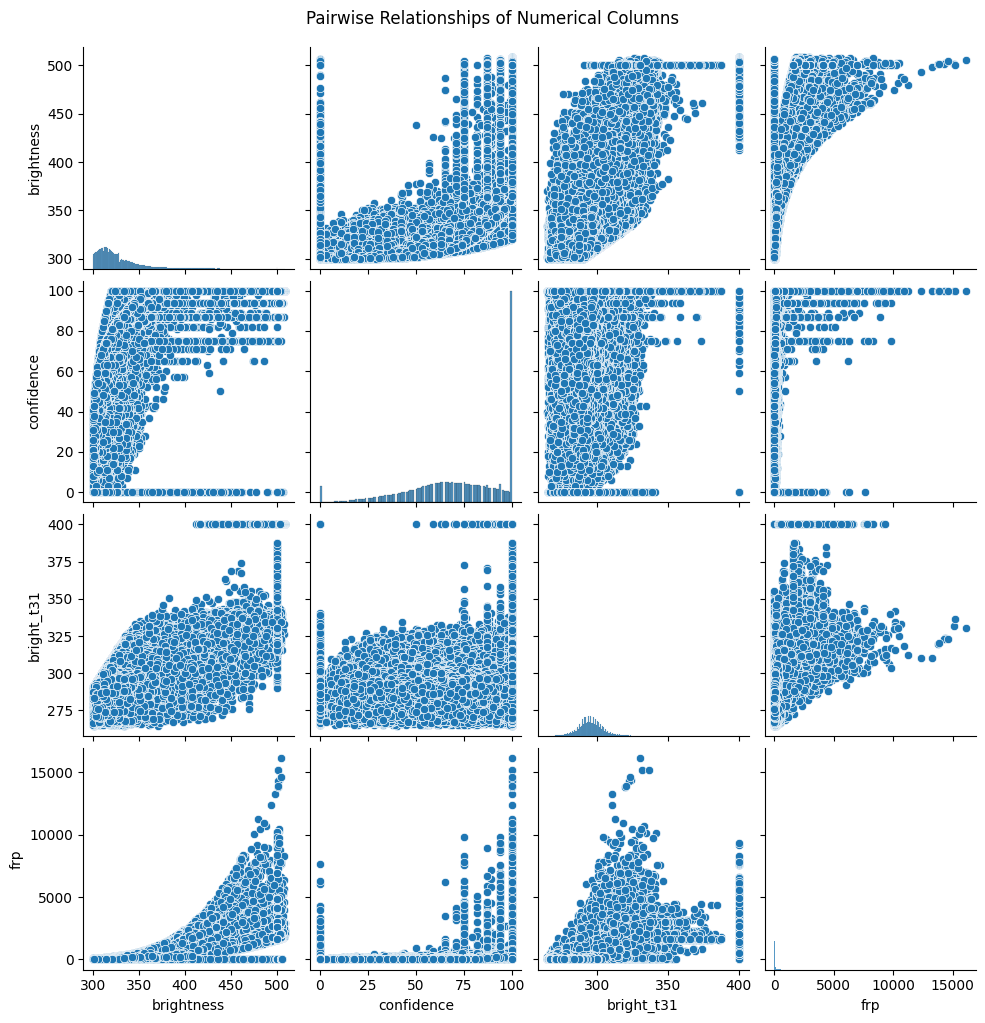

In [26]:
# Create a pair plot of selected numerical columns
num_cols = ['brightness', 'confidence', 'bright_t31', 'frp']
sns.pairplot(data[num_cols])
plt.suptitle('Pairwise Relationships of Numerical Columns', y=1.02)
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='type', ylabel='count'>

Text(0.5, 1.0, 'Count of Wildfire Types')

Text(0.5, 0, 'Wildfire Type')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

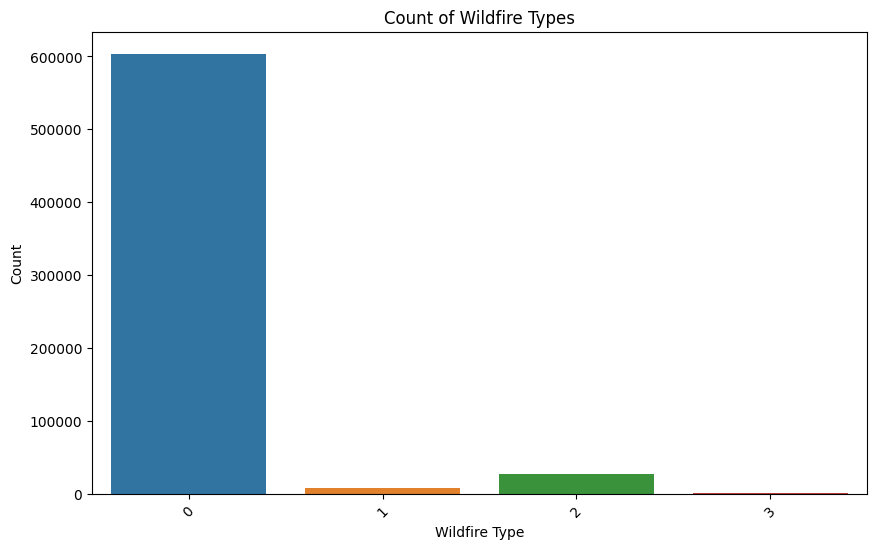

In [27]:
# Create a count plot of wildfire types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data)
plt.title('Count of Wildfire Types')
plt.xlabel('Wildfire Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The code below accomplishes the following tasks:-
1. Displays basic statistics of the numerical columns like brightness, confidence, etc.
2. Creates a count plot to show the distribution of different types of wildfires.
3. Creates histograms to visualize the distribution of brightness and confidence values.
4. Generates a scatter plot showing the relationship between brightness and confidence.
5. Creates a scatter plot of latitude and longitude to visualize the geographic distribution of wildfires.


          brightness     confidence     bright_t31            frp
count  638182.000000  638182.000000  638182.000000  638182.000000
mean      328.264747      69.787711     295.659705      88.716321
std        27.300000      23.849877      10.365997     296.234418
min       300.000000       0.000000     264.600000       0.000000
25%       310.900000      54.000000     289.800000      11.900000
50%       320.500000      71.000000     295.000000      25.400000
75%       336.300000      90.000000     300.600000      62.800000
max       508.800000     100.000000     400.100000   16146.400000


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='type', ylabel='count'>

Text(0.5, 1.0, 'Count of Wildfire Types')

Text(0.5, 0, 'Wildfire Type')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

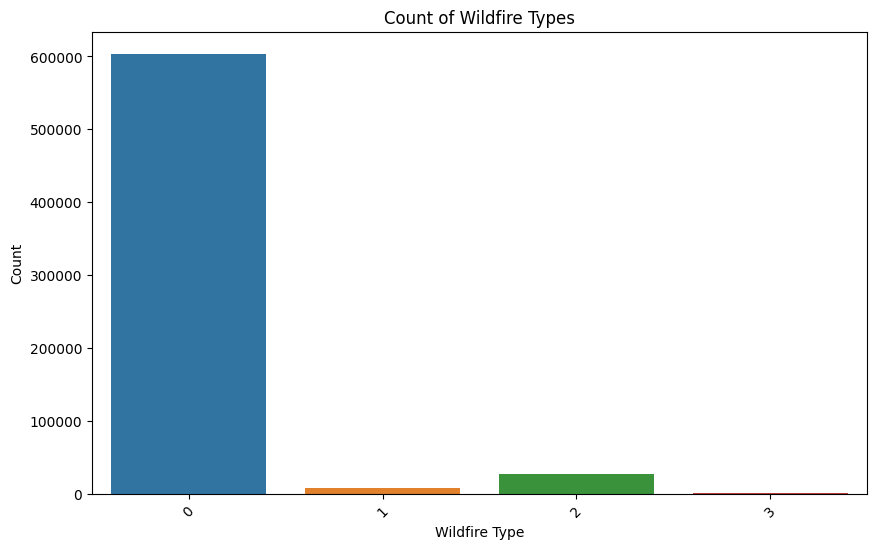

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='brightness', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Brightness')

<Axes: >

<Axes: xlabel='confidence', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Confidence')

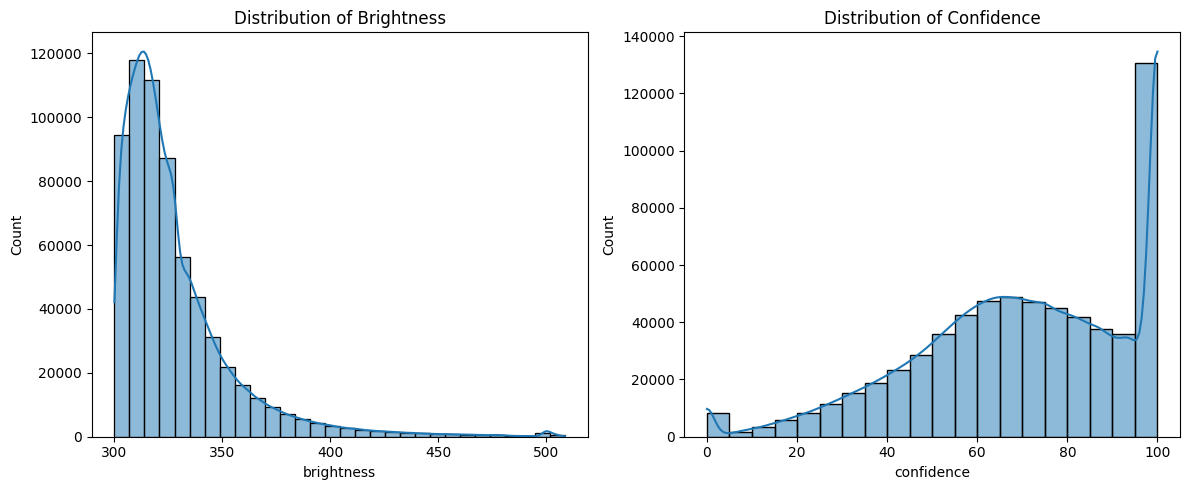

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='brightness', ylabel='confidence'>

Text(0.5, 1.0, 'Brightness vs Confidence')

Text(0.5, 0, 'Brightness')

Text(0, 0.5, 'Confidence')

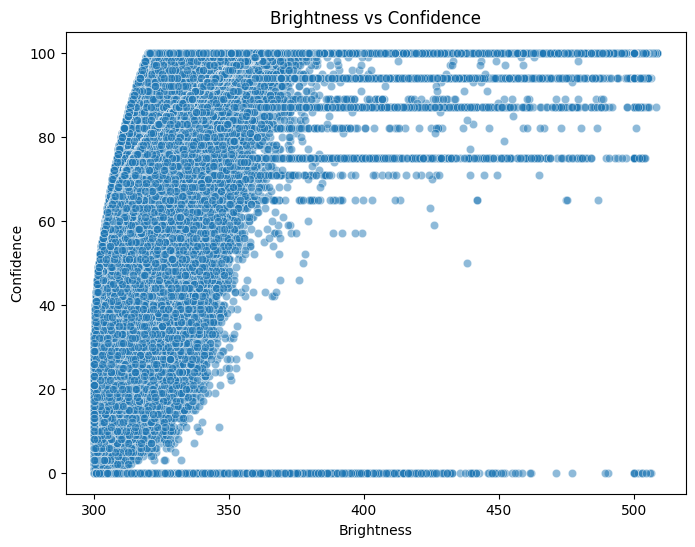

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='longitude', ylabel='latitude'>

Text(0.5, 1.0, 'Geographic Distribution of Wildfires')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

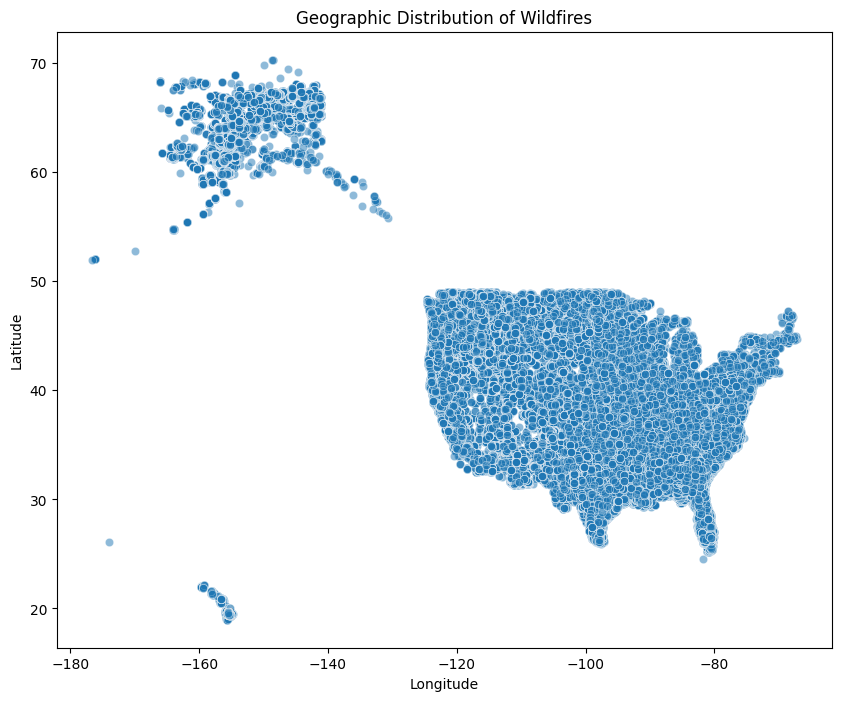

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics of numerical columns
numerical_cols = ['brightness', 'confidence', 'bright_t31', 'frp']
print(data[numerical_cols].describe())

# Count of different types of wildfires
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data)
plt.title('Count of Wildfire Types')
plt.xlabel('Wildfire Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of brightness and confidence
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['brightness'], bins=30, kde=True)
plt.title('Distribution of Brightness')

plt.subplot(1, 2, 2)
sns.histplot(data['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.tight_layout()
plt.show()

# Relationship between brightness and confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(x='brightness', y='confidence', data=data, alpha=0.5)
plt.title('Brightness vs Confidence')
plt.xlabel('Brightness')
plt.ylabel('Confidence')
plt.show()

# Geographic distribution of wildfires
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=data, alpha=0.5)
plt.title('Geographic Distribution of Wildfires')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [36]:
# Display basic information about the dataset
print(data.head())
print(data.info())

   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   40.3912   -79.8591       301.6   1.6    1.2  2018-06-01       257   
1   41.4612   -81.6754       305.3   1.9    1.3  2018-06-01       258   
2   30.3241   -91.2348       309.1   1.4    1.2  2018-06-01       433   
3   33.7179   -95.9885       307.3   1.0    1.0  2018-06-01       434   
4   31.6460  -101.7709       309.0   1.7    1.3  2018-06-01       434   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          42     6.03       289.7   7.0        N     2  
1     Terra      MODIS          64     6.03       291.1  12.8        N     2  
2     Terra      MODIS          74     6.03       296.7  11.4        N     2  
3     Terra      MODIS          69     6.03       297.1   4.8        N     0  
4     Terra      MODIS          70     6.03       297.7  14.9        N     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638182 entries, 0 to 638181
Data colu

# Data Preprocessing

In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [76]:
# Drop columns that might not be useful for anomaly detection
data = pd.read_csv("data/fire_archive_M-C61_358737.csv")
data = data.drop(['acq_date', 'acq_time', 'satellite', 'instrument', 'version'], axis=1)

# Convert 'daynight' and 'type' columns to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['daynight', 'type'], drop_first=True)

# Initialize the Isolation Forest model
clf = IsolationForest(contamination='auto', random_state=42)  # contamination is the expected proportion of outliers

# Train the model
data = data[['latitude', 'longitude']]
clf.fit(data)



IsolationForest(random_state=42)

In [77]:
# Predict anomalies (1 for inliers, -1 for outliers)
anomaly_preds = clf.predict(data)

# Convert -1 to 0 for easier interpretation
anomaly_preds[anomaly_preds == -1] = 0


In [78]:
# Add a column of ones as the target
data['target'] = 1
# Generate classification report
report = classification_report(data['target'], anomaly_preds, zero_division=1)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.77      0.87    638182

    accuracy                           0.77    638182
   macro avg       0.50      0.89      0.44    638182
weighted avg       1.00      0.77      0.87    638182



In [79]:
import joblib
# Save the trained model
joblib.dump(clf, 'isolation_forest_model.pkl')
# To load the model later
loaded_model = joblib.load('isolation_forest_model.pkl')
loaded_model

['isolation_forest_model.pkl']

IsolationForest(random_state=42)

In [80]:
data.columns

Index(['latitude', 'longitude', 'target'], dtype='object')

In [84]:
anomaly_preds = loaded_model.predict(data[['latitude', 'longitude']])
# Convert -1 to 0 for easier interpretation
anomaly_preds[anomaly_preds == -1] = 0
anomaly_preds

array([0, 0, 1, ..., 1, 1, 1])

In [85]:
# Print the anomaly predictions
print("Anomaly Predictions:\n", anomaly_preds)

Anomaly Predictions:
 [0 0 1 ... 1 1 1]
